In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Netflix_Dataset.csv')
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
data.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [5]:
data.shape

(7789, 11)

In [6]:
data.index

RangeIndex(start=0, stop=7789, step=1)

In [7]:
data.size

85679

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


# Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [9]:
data.duplicated().sum()

2

In [10]:
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

# Task. 2) Is there any Null Value present in any column ? Show with Heat-map.

In [13]:
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [14]:
import seaborn as sns

<AxesSubplot:>

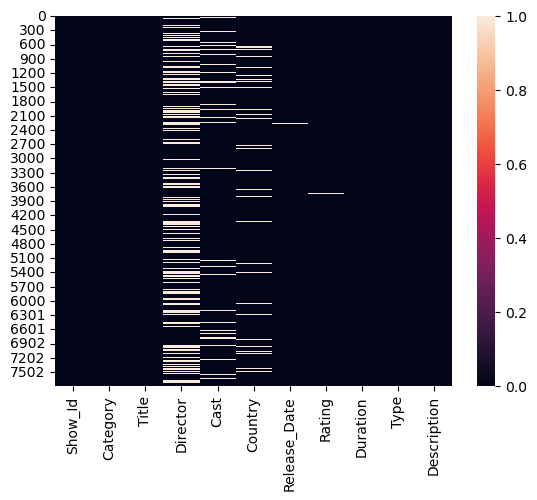

In [15]:
sns.heatmap(data.isnull())

# Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [16]:
data.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [17]:
data[data['Title'] == 'House of Cards'][['Show_Id','Director','Title']]

,Show_Id,Director,Title
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J...",House of Cards


# Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [18]:
data['Category'].value_counts()

Movie      5377
TV Show    2410
Name: Category, dtype: int64

In [19]:
data['year'] = pd.to_datetime(data['Release_Date']).dt.year
data['year'].isnull().sum()
data.dropna(inplace=True)

In [20]:
data['year'] = data['year'].astype(int)
data['year']

1       2016
2       2018
3       2017
4       2020
5       2017
        ... 
7780    2019
7782    2018
7783    2020
7784    2020
7785    2019
Name: year, Length: 4809, dtype: int32

<AxesSubplot:>

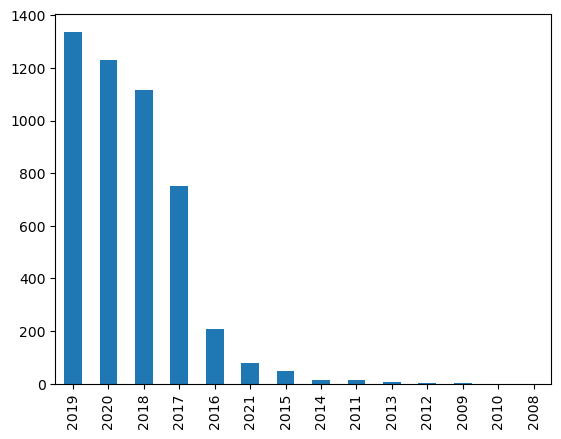

In [21]:
data['year'].value_counts().plot(kind='bar')

# Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

In [22]:
# data.groupby('Category').count()
data['Category'].value_counts()

Movie      4673
TV Show     136
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

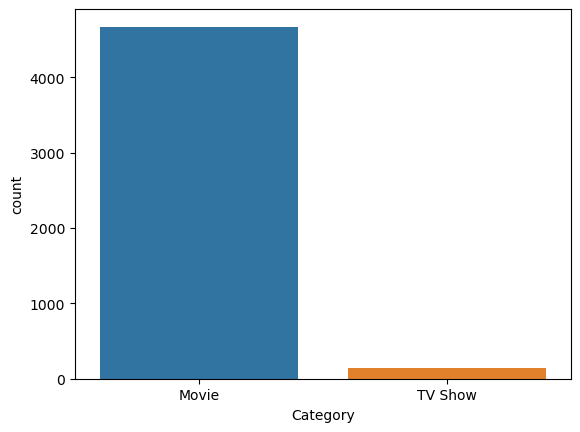

In [23]:
sns.countplot(x=data['Category'])

# Q. 4) Show all the Movies that were released in year 2000.

In [24]:
data[(data['Category'] == 'Movie') & (data['year'] ==2020)] 

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",2020
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7746,s7745,Movie,"Yours Sincerely, Kanan Gill",Neville Shah,Kanan Gill,India,"April 24, 2020",TV-MA,72 min,Stand-Up Comedy,Revisiting life goals set in a letter written ...,2020
7750,s7749,Movie,الف مبروك,Ahmed Nader Galal,"Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...",Egypt,"April 25, 2020",TV-14,115 min,"Comedies, Dramas, International Movies","On his wedding day, an arrogant, greedy accoun...",2020
7762,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,2020
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020


# Q. 5) Show only the Titles of all TV Shows that were released in India only.

In [25]:
data['Country'].value_counts()

United States                                                   1654
India                                                            832
United Kingdom                                                   174
Canada                                                           104
Egypt                                                             87
                                                                ... 
United Kingdom, Canada, United States, Cayman Islands              1
Netherlands, Belgium                                               1
United Kingdom, Denmark, Canada, Croatia                           1
Thailand, United States                                            1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: Country, Length: 544, dtype: int64

In [26]:
data[(data['Category'] =="TV Show") & (data['Country'] =="India")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,2019
2406,s2407,TV Show,GHOUL,Patrick Graham,"Radhika Apte, Manav Kaul, Ratnabali Bhattachar...",India,"August 24, 2018",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Horror",When a new prisoner at a military detention ce...,2018
3119,s3120,TV Show,Jamtara - Sabka Number Ayega,Soumendra Padhi,"Amit Sial, Dibyendu Bhattacharya, Aksha Pardha...",India,"January 10, 2020",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A group of small-town young men run a lucrativ...,2020
4724,s4725,TV Show,Paava Kadhaigal,"Sudha Kongara, Vignesh Shivan, Gautham Vasudev...","Kalidas Jayaram, Shanthnu Bhagyaraj, Bhavani S...",India,"December 18, 2020",TV-MA,1 Season,"International TV Shows, TV Dramas","At times dark, at times disturbing, four short...",2020
6037,s6037,TV Show,Th Eena Meena Deeka Chase Comedy Show,Dheeraj Berry,"Sanjay Keni, Priya Raina",India,"March 31, 2018",TV-Y7,1 Season,"Kids' TV, TV Comedies","A hungry fox and three resourceful, surprising...",2018


# Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [27]:
data['Director'].value_counts().sort_values(ascending=False).head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Name: Director, dtype: int64

# Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [28]:
data[(data['Category'] =='Movie') & (data['Type'] == 'Comedies') | (data['Country'] == 'United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,"April 16, 2019",R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019
93,s94,Movie,27: Gone Too Soon,Simon Napier-Bell,"Janis Joplin, Jimi Hendrix, Amy Winehouse, Jim...",United Kingdom,"May 1, 2018",TV-MA,70 min,Documentaries,Explore the circumstances surrounding the trag...,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
7615,s7614,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,United Kingdom,"February 1, 2019",TV-14,50 min,Documentaries,A Cambridge geneticist dispels misconceptions ...,2019
7623,s7622,Movie,Wild Oats,Andy Tennant,"Shirley MacLaine, Jessica Lange, Billy Connoll...","Germany, United States","May 13, 2017",PG-13,86 min,Comedies,"When insurance accidentally pays her millions,...",2017
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,"May 10, 2019",R,104 min,Comedies,When longtime friends meet up for a wine-soake...,2019
7664,s7663,Movie,Work It,Laura Terruso,"Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...",United States,"August 7, 2020",TV-14,94 min,Comedies,A brilliant but clumsy high school senior vows...,2020


# Q. 8) In how many movies/shows, Tom Cruise was cast ?

In [29]:
data[data['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019


# Q. 9) What are the different Ratings defined by Netflix ?

In [30]:
data["Rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG', 'G',
       'TV-Y7', 'TV-Y', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

# Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?

In [31]:
#data['Country'].unique()

In [32]:
#data

In [33]:
data.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description', 'year'],
      dtype='object')

In [34]:
data[(data['Category'] == "Movie") & (data['Rating'] == "TV-14") & (data['Country'] == 'Canada')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,"December 27, 2018",TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,"July 1, 2018",TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,"November 12, 2017",TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,"October 14, 2019",TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...,2019
5336,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,"August 22, 2017",TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...,2017
5393,s5393,Movie,Sardaar ji,Rohit Jugraj,"Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...",Canada,"December 1, 2017",TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...,2017
7025,s7024,Movie,The Wrong Babysitter,George Mendeluk,"Daphne Zuniga, Seann Gallagher, Lisa Marie Car...",Canada,"June 18, 2019",TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...,2019
7041,s7040,Movie,There's Something in the Water,"Ellen Page, Ian Daniel",Ellen Page,Canada,"March 27, 2020",TV-14,72 min,"Documentaries, International Movies",This documentary spotlights the struggle of mi...,2020


# Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?

In [35]:
data[(data['Category'] == 'Movie') & (data['Rating'] == 'R') & (data['year'] > 2018)]
#data[data['Rating'] == 'R']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020
65,s66,Movie,13 Sins,Daniel Stamm,"Mark Webber, Rutina Wesley, Devon Graye, Tom B...",United States,"January 13, 2019",R,93 min,"Horror Movies, Thrillers",A man agrees to appear on a game show with a $...,2019
68,s69,Movie,14 Blades,Daniel Lee,"Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...","Hong Kong, China, Singapore","April 3, 2019",R,113 min,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",2019
83,s84,Movie,20th Century Women,Mike Mills,"Annette Bening, Elle Fanning, Greta Gerwig, Lu...",United States,"June 28, 2019",R,119 min,"Dramas, Independent Movies","In 1979, single bohemian mom Dorothea, hoping ...",2019
...,...,...,...,...,...,...,...,...,...,...,...,...
7659,s7658,Movie,Woodshock,"Kate Mulleavy, Laura Mulleavy","Kirsten Dunst, Joe Cole, Pilou Asbæk, Jack Kil...",United States,"June 21, 2020",R,101 min,"Dramas, Independent Movies, Thrillers","Shattered after her mother's death, a woman fl...",2020
7712,s7711,Movie,"Yes, God, Yes",Karen Maine,"Natalia Dyer, Timothy Simons, Wolfgang Novogra...",United States,"October 22, 2020",R,78 min,"Comedies, Dramas, Independent Movies",A devoutly religious teen grapples with her ow...,2020
7738,s7737,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,2019
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019


# Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

In [36]:
data.groupby(data['Category'])['Duration'].max()

Category
Movie         99 min
TV Show    9 Seasons
Name: Duration, dtype: object

In [37]:
data[["Min","Unit"]] = data['Duration'].str.split(" ",expand=True)
data["Min"].max()

'99'

# Q. 11) Which individual country has the Highest No. of TV Shows ?


In [38]:
data_tv_show=data[data['Category'] == 'TV Show']

In [39]:
data_tv_show['Country'].value_counts()

United States                                                    27
United Kingdom                                                   19
Japan                                                            10
South Korea                                                      10
Spain                                                             7
Taiwan                                                            6
Turkey                                                            5
India                                                             5
Brazil                                                            4
Canada                                                            3
Thailand                                                          3
Nigeria                                                           3
France                                                            3
China                                                             2
Italy                                           

# Q. 12) How can we sort the dataset by Year ?

In [40]:
data.sort_values(by="year")

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year,Min,Unit
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008,81,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009,29,min
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009,104,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010,84,min
3221,s3222,Movie,Joseph: King of Dreams,"Rob LaDuca, Robert C. Ramirez","Ben Affleck, Mark Hamill, Richard Herd, Mauree...",United States,"September 27, 2011",TV-PG,75 min,"Children & Family Movies, Dramas, Faith & Spir...",With his gift of dream interpretation and his ...,2011,75,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,s1427,Movie,Cloudy with a Chance of Meatballs,"Phil Lord, Christopher Miller","Bill Hader, Anna Faris, James Caan, Andy Sambe...",United States,"January 1, 2021",PG,90 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When inventor Flint Lockwood makes clouds rain...,2021,90,min
1739,s1740,Movie,Dhobi Ghat (Mumbai Diaries),Kiran Rao,"Aamir Khan, Monica Dogra, Kriti Malhotra, Prat...",India,"January 10, 2021",TV-MA,102 min,"Dramas, International Movies","In this intimate drama, circumstances draw tog...",2021,102,min
7553,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a...",2021,102,min
2479,s2480,Movie,Good Hair,Jeff Stilson,"Chris Rock, Nia Long, Maya Angelou, Ice-T, Eve...",United States,"January 1, 2021",PG-13,96 min,Documentaries,Chris Rock hops around the world going from be...,2021,96,min


# Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [41]:
data[((data['Category'] == 'Movie') & (data['Type'] == 'Dramas') ) | ((data['Category'] == 'TV Show') & (data['Type'] == 'Kids TV'))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year,Min,Unit
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019,119,min
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019,110,min
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011,95,min
295,s296,Movie,Across Grace Alley,Ralph Macchio,"Ben Hyland, Marsha Mason, Karina Smirnoff, Col...",United States,"December 1, 2016",TV-PG,24 min,Dramas,"A young boy, upset by his parents' divorce, be...",2016,24,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,s7416,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,"July 24, 2017",PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join...",2017,110,min
7422,s7421,Movie,Villain,Philip Barantini,"Craig Fairbrass, George Russo, Robert Gleniste...",United Kingdom,"September 5, 2020",R,97 min,Dramas,"Fresh out of prison, an ex-con tries to save h...",2020,97,min
7449,s7448,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...,2019,99,min
7465,s7464,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,2019,109,min
